# 1 Gradient Ascent

## 1.1 Implement The 1D GA Algorithm

As a warm-up exercise, your  rst task is to implement 1-dimensional version of GA. Let's look at 1D case
with f(x) = −x^2. Pick an x0 (but don't pick x0 = 0), and set the learning rate R = 0.1.

#### 1. Start slow and manual.  

(a) What is the correct location of the maximum of this function?  
When x = 0.  
  
(b) What is the gradient vector of the function? What is it's dimension?  
∇f(x)=(-2x)
Its dimension is 1.  
  
(c) Compute the gradient at x0, ∇f(x0).  
I picked x0=2  
So ∇f(2)=(-2*2)=-4  
  
(d) Compute x1 = x0 + R · ∇f(x0).  
x1=2+0.1*(-4)=1.6  
  
(e) Did we move closer to the maximum?  
Yes. 

In [3]:
import sympy as symp
import math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
x,y=symp.symbols('x y')
y=-x**2
print(symp.diff(y,x))
print(symp.diff(y,x).subs(x,2))

-2*x
-4


#### 2.Now repeat the previous exercise on computer. Choose at least one stopping criterion and it's parameter ε, and the bail-out number of iterations, R. Implement the above as an algorithm that at each step prints out the x value, the function's value f(x) and gradient ∇f(x). At the end it should print the solution, and also how many iterations it took for the loop to converge (to  nish).

In [2]:
import sympy as symp
import math
import time

x,y=symp.symbols('x y')
y=-x**2

# Get the derivative of function u(x) at a numeric point xn
def d_num(ux,x_num):
    return symp.diff(ux,x).subs(x,x_num)

start_x=2
epsilon=1e-6

def func(start_point,R,epsilon):
    start_time = time.time()
    x0=start_point
    x1=x0+R*d_num(y,x0)
    iteration=1
    print('Iteration='+str(iteration)+'; x1='+str(x1)+'; f(x1)='+str(y.subs(x,x1))+'; Gradient ∇f(x)='+str(d_num(y,x1)))
    while(abs(d_num(y,x1))>epsilon):
        x1=x1+R*d_num(y,x1)
        iteration+=1
        print('Iteration='+str(iteration)+'; x1='+str(x1)+'; f(x1)='+str(y.subs(x,x1))+'; Gradient ∇f(x)='+str(d_num(y,x1)))
    print('\n')
    print('f(x)='+str(round(y.subs(x,x1)))+'; start point='+str(start_point)+'; R='+str(R)+'; epsilon='+str(epsilon))
    print('Number of iteration ='+str(iteration)+'; soltion: x =',round(x1,5))
    print('\n')
    print("--- %s seconds ---" % (time.time() - start_time))
func(start_x,0.1,epsilon)

Iteration=1; x1=1.60000000000000; f(x1)=-2.56000000000000; Gradient ∇f(x)=-3.20000000000000
Iteration=2; x1=1.28000000000000; f(x1)=-1.63840000000000; Gradient ∇f(x)=-2.56000000000000
Iteration=3; x1=1.02400000000000; f(x1)=-1.04857600000000; Gradient ∇f(x)=-2.04800000000000
Iteration=4; x1=0.819200000000000; f(x1)=-0.671088640000000; Gradient ∇f(x)=-1.63840000000000
Iteration=5; x1=0.655360000000000; f(x1)=-0.429496729600000; Gradient ∇f(x)=-1.31072000000000
Iteration=6; x1=0.524288000000000; f(x1)=-0.274877906944000; Gradient ∇f(x)=-1.04857600000000
Iteration=7; x1=0.419430400000000; f(x1)=-0.175921860444160; Gradient ∇f(x)=-0.838860800000000
Iteration=8; x1=0.335544320000000; f(x1)=-0.112589990684262; Gradient ∇f(x)=-0.671088640000000
Iteration=9; x1=0.268435456000000; f(x1)=-0.0720575940379280; Gradient ∇f(x)=-0.536870912000000
Iteration=10; x1=0.214748364800000; f(x1)=-0.0461168601842739; Gradient ∇f(x)=-0.429496729600000
Iteration=11; x1=0.171798691840000; f(x1)=-0.02951479051793

#### 3.Experiment with di erent starting values, learning rates and stopping parameter values. Comment and explain your  ndings.

In [4]:
func(-10,0.1,1e-6)

Iteration=1; x1=-8.00000000000000; f(x1)=-64.0000000000000; Gradient ∇f(x)=16.0000000000000
Iteration=2; x1=-6.40000000000000; f(x1)=-40.9600000000000; Gradient ∇f(x)=12.8000000000000
Iteration=3; x1=-5.12000000000000; f(x1)=-26.2144000000000; Gradient ∇f(x)=10.2400000000000
Iteration=4; x1=-4.09600000000000; f(x1)=-16.7772160000000; Gradient ∇f(x)=8.19200000000000
Iteration=5; x1=-3.27680000000000; f(x1)=-10.7374182400000; Gradient ∇f(x)=6.55360000000000
Iteration=6; x1=-2.62144000000000; f(x1)=-6.87194767360000; Gradient ∇f(x)=5.24288000000000
Iteration=7; x1=-2.09715200000000; f(x1)=-4.39804651110400; Gradient ∇f(x)=4.19430400000000
Iteration=8; x1=-1.67772160000000; f(x1)=-2.81474976710656; Gradient ∇f(x)=3.35544320000000
Iteration=9; x1=-1.34217728000000; f(x1)=-1.80143985094820; Gradient ∇f(x)=2.68435456000000
Iteration=10; x1=-1.07374182400000; f(x1)=-1.15292150460685; Gradient ∇f(x)=2.14748364800000
Iteration=11; x1=-0.858993459200000; f(x1)=-0.737869762948382; Gradient ∇f(x)=1

In [6]:
func(0.1,0.1,1e-6)

Iteration=1; x1=0.0800000000000000; f(x1)=-0.00640000000000000; Gradient ∇f(x)=-0.160000000000000
Iteration=2; x1=0.0640000000000000; f(x1)=-0.00409600000000000; Gradient ∇f(x)=-0.128000000000000
Iteration=3; x1=0.0512000000000000; f(x1)=-0.00262144000000000; Gradient ∇f(x)=-0.102400000000000
Iteration=4; x1=0.0409600000000000; f(x1)=-0.00167772160000000; Gradient ∇f(x)=-0.0819200000000000
Iteration=5; x1=0.0327680000000000; f(x1)=-0.00107374182400000; Gradient ∇f(x)=-0.0655360000000000
Iteration=6; x1=0.0262144000000000; f(x1)=-0.000687194767360000; Gradient ∇f(x)=-0.0524288000000000
Iteration=7; x1=0.0209715200000000; f(x1)=-0.000439804651110400; Gradient ∇f(x)=-0.0419430400000000
Iteration=8; x1=0.0167772160000000; f(x1)=-0.000281474976710656; Gradient ∇f(x)=-0.0335544320000000
Iteration=9; x1=0.0134217728000000; f(x1)=-0.000180143985094820; Gradient ∇f(x)=-0.0268435456000000
Iteration=10; x1=0.0107374182400000; f(x1)=-0.000115292150460685; Gradient ∇f(x)=-0.0214748364800000
Iterati

In [7]:
func(10,0.3,1e-20)

Iteration=1; x1=4.00000000000000; f(x1)=-16.0000000000000; Gradient ∇f(x)=-8.00000000000000
Iteration=2; x1=1.60000000000000; f(x1)=-2.56000000000000; Gradient ∇f(x)=-3.20000000000000
Iteration=3; x1=0.640000000000000; f(x1)=-0.409600000000000; Gradient ∇f(x)=-1.28000000000000
Iteration=4; x1=0.256000000000000; f(x1)=-0.0655360000000000; Gradient ∇f(x)=-0.512000000000000
Iteration=5; x1=0.102400000000000; f(x1)=-0.0104857600000000; Gradient ∇f(x)=-0.204800000000000
Iteration=6; x1=0.0409600000000000; f(x1)=-0.00167772160000000; Gradient ∇f(x)=-0.0819200000000000
Iteration=7; x1=0.0163840000000000; f(x1)=-0.000268435456000000; Gradient ∇f(x)=-0.0327680000000000
Iteration=8; x1=0.00655360000000000; f(x1)=-4.29496729600000e-5; Gradient ∇f(x)=-0.0131072000000000
Iteration=9; x1=0.00262144000000000; f(x1)=-6.87194767360001e-6; Gradient ∇f(x)=-0.00524288000000000
Iteration=10; x1=0.00104857600000000; f(x1)=-1.09951162777600e-6; Gradient ∇f(x)=-0.00209715200000000
Iteration=11; x1=0.000419430

In [8]:
func(10,0.3,1e-10)

Iteration=1; x1=4.00000000000000; f(x1)=-16.0000000000000; Gradient ∇f(x)=-8.00000000000000
Iteration=2; x1=1.60000000000000; f(x1)=-2.56000000000000; Gradient ∇f(x)=-3.20000000000000
Iteration=3; x1=0.640000000000000; f(x1)=-0.409600000000000; Gradient ∇f(x)=-1.28000000000000
Iteration=4; x1=0.256000000000000; f(x1)=-0.0655360000000000; Gradient ∇f(x)=-0.512000000000000
Iteration=5; x1=0.102400000000000; f(x1)=-0.0104857600000000; Gradient ∇f(x)=-0.204800000000000
Iteration=6; x1=0.0409600000000000; f(x1)=-0.00167772160000000; Gradient ∇f(x)=-0.0819200000000000
Iteration=7; x1=0.0163840000000000; f(x1)=-0.000268435456000000; Gradient ∇f(x)=-0.0327680000000000
Iteration=8; x1=0.00655360000000000; f(x1)=-4.29496729600000e-5; Gradient ∇f(x)=-0.0131072000000000
Iteration=9; x1=0.00262144000000000; f(x1)=-6.87194767360001e-6; Gradient ∇f(x)=-0.00524288000000000
Iteration=10; x1=0.00104857600000000; f(x1)=-1.09951162777600e-6; Gradient ∇f(x)=-0.00209715200000000
Iteration=11; x1=0.000419430

Comment:  
Whether the start point is at left or right of the maximum point does not matter.  
The larger R, or the smaller epsilon, or the closer to max start point, the fewer iterations.  
As x1 moves closer to maximum point, more interations are needed to close in further.  
0 epsilon seems to lead to an infinite loop.

## 1.2 Implement The 2D Version

#### 4.Write x = (x1, x2) and A. Show that f(x) = −x'Ax describes a quadratic function.  
f(x)=−x'Ax= - a11 * x1^2  -  (a12+a21) * x1*x2 -  a22 * x2^2

#### 5.What is the condition that the problem has a single maximum, i.e. f(x)<=0 for all x? What's the location of it's true maximum?  
It's non-positive definite, which means f(x) are all negative or 0.  
To have a single maximum, there should be only 1 gradient vector that euquals to (0,0)', and the location is at where all gradients equal to 0, ie ∇f(x)=(0,0)'

#### 6.Compute the gradient vector of this function. Use the non-vector form you did under 4 above  
∇f(x)= (  - 2*a11*x1 - (a21+a12)*x2,   - (a12+a21)*x1 - 2a22*x2  )'

#### 7.Now code the algorithm above for 2D case. Do it in matrix form! Show that you get the correct solution if you pick x = (2,−3)'

In [9]:
import numpy as np
import pandas as pd
def f(x,A):
    return float(-x.T*A*x)
def grad(x,A):
    return -(A.T+A)*x



start_x=np.matrix('2 -3').T
A=np.matrix('1 2; 2 8')
R=0.1
epsilon=1e-8

def run(start_point,A,R,epsilon):
    start_time = time.time()
    x0=start_point
    x1=x0+R*grad(x0,A)
    iteration=1
    print('\nIteration='+str(iteration)+';\n x1=',x1,';\n f(x1)='+str(f(x1,A))+';\n Gradient ∇f(x)=',grad(x1,A))
    while(abs(sum(np.sqrt(np.array(grad(x1,A))**2)))>epsilon):
        x1=x1+R*grad(x1,A)
        iteration+=1
        print('\nIteration='+str(iteration)+';\n x1=',x1,';\n f(x1)='+str(f(x1,A))+';\n Gradient ∇f(x)=',grad(x1,A))
    print('\n')
    print('f(x)=',round(float(f(x1,A))),';\n start point='+str(start_point)+';\n R='+str(R)+';\n epsilon='+str(epsilon))
    print('Number of iteration ='+str(iteration)+'; soltion: x =',np.array(x1).round())
    print('\n')
    print("--- %s seconds ---" % (time.time() - start_time))
run(start_x,A,R,epsilon)


Iteration=1;
 x1= [[2.8]
 [1. ]] ;
 f(x1)=-27.04;
 Gradient ∇f(x)= [[ -9.6]
 [-27.2]]

Iteration=2;
 x1= [[ 1.84]
 [-1.72]] ;
 f(x1)=-14.393600000000005;
 Gradient ∇f(x)= [[ 3.2 ]
 [20.16]]

Iteration=3;
 x1= [[2.16 ]
 [0.296]] ;
 f(x1)=-7.923968000000005;
 Gradient ∇f(x)= [[ -5.504]
 [-13.376]]

Iteration=4;
 x1= [[ 1.6096]
 [-1.0416]] ;
 f(x1)=-4.564019200000003;
 Gradient ∇f(x)= [[ 0.9472]
 [10.2272]]

Iteration=5;
 x1= [[ 1.70432]
 [-0.01888]] ;
 f(x1)=-2.7788480512000016;
 Gradient ∇f(x)= [[-3.33312]
 [-6.5152 ]]

Iteration=6;
 x1= [[ 1.371008]
 [-0.6704  ]] ;
 f(x1)=-1.7986571632640012;
 Gradient ∇f(x)= [[-0.060416]
 [ 5.242368]]

Iteration=7;
 x1= [[ 1.3649664]
 [-0.1461632]] ;
 f(x1)=-1.2360112937369607;
 Gradient ∇f(x)= [[-2.14528  ]
 [-3.1212544]]

Iteration=8;
 x1= [[ 1.1504384 ]
 [-0.45828864]] ;
 f(x1)=-0.8948049336598534;
 Gradient ∇f(x)= [[-0.46772224]
 [ 2.73086464]]

Iteration=9;
 x1= [[ 1.10366618]
 [-0.18520218]] ;
 f(x1)=-0.6748722865163473;
 Gradient ∇f(x)= [[-1.4

In [10]:
run(start_x,A,0.05,epsilon)


Iteration=1;
 x1= [[ 2.4]
 [-1. ]] ;
 f(x1)=-4.16;
 Gradient ∇f(x)= [[-0.8]
 [ 6.4]]

Iteration=2;
 x1= [[ 2.36]
 [-0.68]] ;
 f(x1)=-2.8495999999999997;
 Gradient ∇f(x)= [[-2.  ]
 [ 1.44]]

Iteration=3;
 x1= [[ 2.26 ]
 [-0.608]] ;
 f(x1)=-2.5685919999999993;
 Gradient ∇f(x)= [[-2.088]
 [ 0.688]]

Iteration=4;
 x1= [[ 2.1556]
 [-0.5736]] ;
 f(x1)=-2.3329383999999993;
 Gradient ∇f(x)= [[-2.0168]
 [ 0.5552]]

Iteration=5;
 x1= [[ 2.05476]
 [-0.54584]] ;
 f(x1)=-2.1192883088;
 Gradient ∇f(x)= [[-1.92616]
 [ 0.5144 ]]

Iteration=6;
 x1= [[ 1.958452]
 [-0.52012 ]] ;
 f(x1)=-1.9252125345439999;
 Gradient ∇f(x)= [[-1.836424]
 [ 0.488112]]

Iteration=7;
 x1= [[ 1.8666308]
 [-0.4957144]] ;
 f(x1)=-1.7489096062734395;
 Gradient ∇f(x)= [[-1.750404 ]
 [ 0.4649072]]

Iteration=8;
 x1= [[ 1.7791106 ]
 [-0.47246904]] ;
 f(x1)=-1.5887517681572365;
 Gradient ∇f(x)= [[-1.66834504]
 [ 0.44306224]]

Iteration=9;
 x1= [[ 1.69569335]
 [-0.45031593]] ;
 f(x1)=-1.4432605161032703;
 Gradient ∇f(x)= [[-1.590122


Iteration=234;
 x1= [[ 3.44210599e-05]
 [-9.14100938e-06]] ;
 f(x1)=-5.947008573573872e-10;
 Gradient ∇f(x)= [[-3.22780822e-05]
 [ 8.57191072e-06]]

Iteration=235;
 x1= [[ 3.28071557e-05]
 [-8.71241385e-06]] ;
 f(x1)=-5.402406364044012e-10;
 Gradient ∇f(x)= [[-3.07646561e-05]
 [ 8.16999858e-06]]

Iteration=236;
 x1= [[ 3.12689229e-05]
 [-8.30391392e-06]] ;
 f(x1)=-4.907676550518884e-10;
 Gradient ∇f(x)= [[-2.93221902e-05]
 [ 7.78693094e-06]]

Iteration=237;
 x1= [[ 2.98028134e-05]
 [-7.91456737e-06]] ;
 f(x1)=-4.4582520272472986e-10;
 Gradient ∇f(x)= [[-2.79473574e-05]
 [ 7.42182423e-06]]

Iteration=238;
 x1= [[ 2.84054456e-05]
 [-7.54347616e-06]] ;
 f(x1)=-4.049983924949817e-10;
 Gradient ∇f(x)= [[-2.66369865e-05]
 [ 7.07383632e-06]]

Iteration=239;
 x1= [[ 2.70735962e-05]
 [-7.18978434e-06]] ;
 f(x1)=-3.679103310469282e-10;
 Gradient ∇f(x)= [[-2.53880551e-05]
 [ 6.74216456e-06]]

Iteration=240;
 x1= [[ 2.58041935e-05]
 [-6.85267612e-06]] ;
 f(x1)=-3.3421863938074163e-10;
 Gradient ∇

 x1= [[ 8.92735137e-08]
 [-2.37078704e-08]] ;
 f(x1)=-4.000325625538425e-15;
 Gradient ∇f(x)= [[-8.37155457e-08]
 [ 2.22318718e-08]]

Iteration=359;
 x1= [[ 8.50877364e-08]
 [-2.25962768e-08]] ;
 f(x1)=-3.6339925107371606e-15;
 Gradient ∇f(x)= [[-7.97903655e-08]
 [ 2.11894835e-08]]

Iteration=360;
 x1= [[ 8.10982181e-08]
 [-2.15368026e-08]] ;
 f(x1)=-3.3012066527250057e-15;
 Gradient ∇f(x)= [[-7.60492257e-08]
 [ 2.01959698e-08]]

Iteration=361;
 x1= [[ 7.72957568e-08]
 [-2.05270042e-08]] ;
 f(x1)=-2.998895933823807e-15;
 Gradient ∇f(x)= [[-7.24834971e-08]
 [ 1.92490391e-08]]

Iteration=362;
 x1= [[ 7.36715820e-08]
 [-1.95645522e-08]] ;
 f(x1)=-2.724269568062731e-15;
 Gradient ∇f(x)= [[-6.90849552e-08]
 [ 1.83465072e-08]]

Iteration=363;
 x1= [[ 7.02173342e-08]
 [-1.86472268e-08]] ;
 f(x1)=-2.474792337995393e-15;
 Gradient ∇f(x)= [[-6.58457611e-08]
 [ 1.74862925e-08]]

Iteration=364;
 x1= [[ 6.69250462e-08]
 [-1.77729122e-08]] ;
 f(x1)=-2.248161190801686e-15;
 Gradient ∇f(x)= [[-6.27584

In [11]:
run(np.matrix('10 5').T,A,0.1,epsilon)


Iteration=1;
 x1= [[ 6.]
 [-7.]] ;
 f(x1)=-260.0;
 Gradient ∇f(x)= [[16.]
 [88.]]

Iteration=2;
 x1= [[7.6]
 [1.8]] ;
 f(x1)=-138.40000000000003;
 Gradient ∇f(x)= [[-22.4]
 [-59.2]]

Iteration=3;
 x1= [[ 5.36]
 [-4.12]] ;
 f(x1)=-76.19200000000004;
 Gradient ∇f(x)= [[ 5.76]
 [44.48]]

Iteration=4;
 x1= [[5.936]
 [0.328]] ;
 f(x1)=-43.884800000000034;
 Gradient ∇f(x)= [[-13.184]
 [-28.992]]

Iteration=5;
 x1= [[ 4.6176]
 [-2.5712]] ;
 f(x1)=-26.719692800000026;
 Gradient ∇f(x)= [[ 1.0496]
 [22.6688]]

Iteration=6;
 x1= [[ 4.72256]
 [-0.30432]] ;
 f(x1)=-17.294780416000005;
 Gradient ∇f(x)= [[ -8.22784]
 [-14.02112]]

Iteration=7;
 x1= [[ 3.899776]
 [-1.706432]] ;
 f(x1)=-11.884723978240004;
 Gradient ∇f(x)= [[-0.973824]
 [11.703808]]

Iteration=8;
 x1= [[ 3.8023936]
 [-0.5360512]] ;
 f(x1)=-8.603893592883201;
 Gradient ∇f(x)= [[-5.4605824]
 [-6.6327552]]

Iteration=9;
 x1= [[ 3.25633536]
 [-1.19932672]] ;
 f(x1)=-6.48915660111872;
 Gradient ∇f(x)= [[-1.71536384]
 [ 6.16388608]]

Iterat

In [12]:
run(start_x,A,0.1,1e-10)


Iteration=1;
 x1= [[2.8]
 [1. ]] ;
 f(x1)=-27.04;
 Gradient ∇f(x)= [[ -9.6]
 [-27.2]]

Iteration=2;
 x1= [[ 1.84]
 [-1.72]] ;
 f(x1)=-14.393600000000005;
 Gradient ∇f(x)= [[ 3.2 ]
 [20.16]]

Iteration=3;
 x1= [[2.16 ]
 [0.296]] ;
 f(x1)=-7.923968000000005;
 Gradient ∇f(x)= [[ -5.504]
 [-13.376]]

Iteration=4;
 x1= [[ 1.6096]
 [-1.0416]] ;
 f(x1)=-4.564019200000003;
 Gradient ∇f(x)= [[ 0.9472]
 [10.2272]]

Iteration=5;
 x1= [[ 1.70432]
 [-0.01888]] ;
 f(x1)=-2.7788480512000016;
 Gradient ∇f(x)= [[-3.33312]
 [-6.5152 ]]

Iteration=6;
 x1= [[ 1.371008]
 [-0.6704  ]] ;
 f(x1)=-1.7986571632640012;
 Gradient ∇f(x)= [[-0.060416]
 [ 5.242368]]

Iteration=7;
 x1= [[ 1.3649664]
 [-0.1461632]] ;
 f(x1)=-1.2360112937369607;
 Gradient ∇f(x)= [[-2.14528  ]
 [-3.1212544]]

Iteration=8;
 x1= [[ 1.1504384 ]
 [-0.45828864]] ;
 f(x1)=-0.8948049336598534;
 Gradient ∇f(x)= [[-0.46772224]
 [ 2.73086464]]

Iteration=9;
 x1= [[ 1.10366618]
 [-0.18520218]] ;
 f(x1)=-0.6748722865163473;
 Gradient ∇f(x)= [[-1.4

Again, like the 1D case,
Whether the start point is at left or right of the maximum point does not matter.  
The larger R, or the smaller epsilon, or the closer to max start point, the fewer iterations.  
As x1 moves closer to maximum point, more interations are needed to close in further.  
0 epsilon seems to lead to an infinite loop.
  
One more comment: R, the learning rate, cannot be too large in some case, or the function won't converge.

#### 8.Visualize your algorithm's work

In [1]:

start_x=np.matrix('2 -3').T
A=np.matrix('1 2; 2 8')
R=0.1
epsilon=1e-8

def plot_(start_point,A,R,epsilon,levels=[-50,-25,-10,-5,-3, -1.5, -1, -0.5, -0.25, 0]):
    start_time = time.time()
    x0=start_point
    x1=x0+R*grad(x0,A)
    iteration=1
    x_plot=[]
    x_plot.append(x0)
    x_plot.append(x1)
    #print('\nIteration='+str(iteration)+';\n x1=',x1,';\n f(x1)='+str(f(x1,A))+';\n Gradient ∇f(x)=',grad(x1,A))
    while(abs(sum(np.sqrt(np.array(grad(x1,A))**2)))>epsilon ):
        x1=x1+R*grad(x1,A)
        iteration+=1
        x_plot.append(x1)
        #print('\nIteration='+str(iteration)+';\n x1=',x1,';\n f(x1)='+str(f(x1,A))+';\n Gradient ∇f(x)=',grad(x1,A))
    print('\n')
    print('f(x)=',round(float(f(x1,A))),';\n start point='+str(start_point)+';\n R='+str(R)+';\n epsilon='+str(epsilon))
    output=x1
    print('Number of iteration ='+str(iteration)+'; soltion: x =',output.round())
    x_s=np.array(x_plot)
    
    ## create 30x30 grid matrix
    n = 100
    ex1 = np.linspace(-3, 3, num=n)
    ex2 = np.linspace(-3, 3, num=n)
    grid1, grid2 = np.meshgrid(ex1, ex2)
    ## fill the grid via looping.  You may prefer to use ufuncs instead.
    z = np.empty_like(grid1)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            x = np.matrix([grid1[i,j], grid2[i,j]]).T
            z[i,j] = f(x,A)

    ## Make the plot
    plt.figure(figsize=(14,14))
    p = plt.contour(grid1, grid2, z,
                    levels = levels,
                    colors = 'black',
                    linestyles='solid')
    plt.clabel(p, inline=1, fontsize=10)
    for idx in range(0,len(x_s)-1):
        plt.scatter(x_s[idx][0], x_s[idx][1],c='red', s=10)
        plt.plot([x_s[idx][0], x_s[idx+1][0]], [x_s[idx][1], x_s[idx+1][1]],c='red')
    print("--- %s seconds ---" % (time.time() - start_time))
plot_(start_x,A,R,epsilon)

IndentationError: unexpected indent (<ipython-input-1-0740cb60ecda>, line 5)

As the interation goes on, the current x moves closer to the solution, and the ascent is less steeper. When the gradient (rate of ascent) is almost 0, here comes the solution, which is right in the center of the graph.

#### 9.Finally, let's try if your code scales to 5D case without any modifications.

In [14]:
temp=np.arange(1,26).reshape(5,5)
A5d=np.matrix(0.5*(temp+temp.T)+np.eye(5)*10)
start=np.matrix(np.arange(1,6)*10).T
run(start,A5d,0.01,1e-10)


Iteration=1;
 x1= [[-19.]
 [-20.]
 [-21.]
 [-22.]
 [-23.]] ;
 f(x1)=-171775.0;
 Gradient ∇f(x)= [[1910.]
 [2560.]
 [3210.]
 [3860.]
 [4510.]]

Iteration=2;
 x1= [[ 0.1]
 [ 5.6]
 [11.1]
 [16.6]
 [22.1]] ;
 f(x1)=-67543.75000000001;
 Gradient ∇f(x)= [[-1109.]
 [-1552.]
 [-1995.]
 [-2438.]
 [-2881.]]

Iteration=3;
 x1= [[-10.99]
 [ -9.92]
 [ -8.85]
 [ -7.78]
 [ -6.71]] ;
 f(x1)=-26644.57750000001;
 Gradient ∇f(x)= [[ 775.1]
 [1019.2]
 [1263.3]
 [1507.4]
 [1751.5]]

Iteration=4;
 x1= [[-3.239]
 [ 0.272]
 [ 3.783]
 [ 7.294]
 [10.805]] ;
 f(x1)=-10584.004375000008;
 Gradient ∇f(x)= [[ -410.69]
 [ -594.4 ]
 [ -778.11]
 [ -961.82]
 [-1145.53]]

Iteration=5;
 x1= [[-7.3459]
 [-5.672 ]
 [-3.9981]
 [-2.3242]
 [-0.6503]] ;
 f(x1)=-4266.769597750003;
 Gradient ∇f(x)= [[326.351]
 [412.816]
 [499.281]
 [585.746]
 [672.211]]

Iteration=6;
 x1= [[-4.08239]
 [-1.54384]
 [ 0.99471]
 [ 3.53326]
 [ 6.07181]] ;
 f(x1)=-1773.002925437501;
 Gradient ∇f(x)= [[-140.2949]
 [-220.9072]
 [-301.5195]
 [-382.1318]


 [-8.70283865e-07]]

Iteration=231;
 x1= [[-1.67432309e-07]
 [-9.82652909e-08]
 [-2.90982728e-08]
 [ 4.00687453e-08]
 [ 1.09235763e-07]] ;
 f(x1)=-1.9213146564174435e-13;
 Gradient ∇f(x)= [[ 1.23550419e-06]
 [ 7.25112014e-07]
 [ 2.14719836e-07]
 [-2.95672341e-07]
 [-8.06064518e-07]]

Iteration=232;
 x1= [[-1.55077267e-07]
 [-9.10141707e-08]
 [-2.69510744e-08]
 [ 3.71120219e-08]
 [ 1.01175118e-07]] ;
 f(x1)=-1.6482240258515406e-13;
 Gradient ∇f(x)= [[ 1.14433477e-06]
 [ 6.71605081e-07]
 [ 1.98875388e-07]
 [-2.73854305e-07]
 [-7.46583997e-07]]

Iteration=233;
 x1= [[-1.43633919e-07]
 [-8.42981199e-08]
 [-2.49623206e-08]
 [ 3.43734788e-08]
 [ 9.37092782e-08]] ;
 f(x1)=-1.4139497818955973e-13;
 Gradient ∇f(x)= [[ 1.05989286e-06]
 [ 6.22046492e-07]
 [ 1.84200122e-07]
 [-2.53646249e-07]
 [-6.91492620e-07]]

Iteration=234;
 x1= [[-1.33034991e-07]
 [-7.80776550e-08]
 [-2.31203193e-08]
 [ 3.18370163e-08]
 [ 8.67943520e-08]] ;
 f(x1)=-1.2129746650730384e-13;
 Gradient ∇f(x)= [[ 9.81682027e-07]
 

 [-2.57514332e-10]]

Iteration=337;
 x1= [[-4.95427077e-11]
 [-2.90763988e-11]
 [-8.61008986e-12]
 [ 1.18562191e-11]
 [ 3.23225280e-11]] ;
 f(x1)=-1.6822070219489575e-20;
 Gradient ∇f(x)= [[ 3.65581909e-10]
 [ 2.14558425e-10]
 [ 6.35349424e-11]
 [-8.74885406e-11]
 [-2.38512024e-10]]

Iteration=338;
 x1= [[-4.58868887e-11]
 [-2.69308145e-11]
 [-7.97474044e-12]
 [ 1.09813337e-11]
 [ 2.99374078e-11]] ;
 f(x1)=-1.4431025239782612e-20;
 Gradient ∇f(x)= [[ 3.38605157e-10]
 [ 1.98725888e-10]
 [ 5.88466186e-11]
 [-8.10326505e-11]
 [-2.20911920e-10]]

Iteration=339;
 x1= [[-4.25008371e-11]
 [-2.49435557e-11]
 [-7.38627425e-12]
 [ 1.01710072e-11]
 [ 2.77282886e-11]] ;
 f(x1)=-1.237983712789199e-20;
 Gradient ∇f(x)= [[ 3.13619054e-10]
 [ 1.84061653e-10]
 [ 5.45042522e-11]
 [-7.50531487e-11]
 [-2.04610550e-10]]

Iteration=340;
 x1= [[-3.93646466e-11]
 [-2.31029391e-11]
 [-6.84123173e-12]
 [ 9.42047568e-12]
 [ 2.56821831e-11]] ;
 f(x1)=-1.062019951920211e-20;
 Gradient ∇f(x)= [[ 2.90476707e-10]
 [ 

In [14]:
temp=np.arange(1,26).reshape(5,5)
A5d=np.matrix(0.5*(temp+temp.T)+np.eye(5)*10)
start=np.matrix(np.arange(1,6)*10).T
run(start,A5d,0.01,1e-10)


Iteration=1;
 x1= [[-19.]
 [-20.]
 [-21.]
 [-22.]
 [-23.]] ;
 f(x1)=-171775.0;
 Gradient ∇f(x)= [[1910.]
 [2560.]
 [3210.]
 [3860.]
 [4510.]]

Iteration=2;
 x1= [[ 0.1]
 [ 5.6]
 [11.1]
 [16.6]
 [22.1]] ;
 f(x1)=-67543.75000000001;
 Gradient ∇f(x)= [[-1109.]
 [-1552.]
 [-1995.]
 [-2438.]
 [-2881.]]

Iteration=3;
 x1= [[-10.99]
 [ -9.92]
 [ -8.85]
 [ -7.78]
 [ -6.71]] ;
 f(x1)=-26644.57750000001;
 Gradient ∇f(x)= [[ 775.1]
 [1019.2]
 [1263.3]
 [1507.4]
 [1751.5]]

Iteration=4;
 x1= [[-3.239]
 [ 0.272]
 [ 3.783]
 [ 7.294]
 [10.805]] ;
 f(x1)=-10584.004375000008;
 Gradient ∇f(x)= [[ -410.69]
 [ -594.4 ]
 [ -778.11]
 [ -961.82]
 [-1145.53]]

Iteration=5;
 x1= [[-7.3459]
 [-5.672 ]
 [-3.9981]
 [-2.3242]
 [-0.6503]] ;
 f(x1)=-4266.769597750003;
 Gradient ∇f(x)= [[326.351]
 [412.816]
 [499.281]
 [585.746]
 [672.211]]

Iteration=6;
 x1= [[-4.08239]
 [-1.54384]
 [ 0.99471]
 [ 3.53326]
 [ 6.07181]] ;
 f(x1)=-1773.002925437501;
 Gradient ∇f(x)= [[-140.2949]
 [-220.9072]
 [-301.5195]
 [-382.1318]


 [-8.70283865e-07]]

Iteration=231;
 x1= [[-1.67432309e-07]
 [-9.82652909e-08]
 [-2.90982728e-08]
 [ 4.00687453e-08]
 [ 1.09235763e-07]] ;
 f(x1)=-1.9213146564174435e-13;
 Gradient ∇f(x)= [[ 1.23550419e-06]
 [ 7.25112014e-07]
 [ 2.14719836e-07]
 [-2.95672341e-07]
 [-8.06064518e-07]]

Iteration=232;
 x1= [[-1.55077267e-07]
 [-9.10141707e-08]
 [-2.69510744e-08]
 [ 3.71120219e-08]
 [ 1.01175118e-07]] ;
 f(x1)=-1.6482240258515406e-13;
 Gradient ∇f(x)= [[ 1.14433477e-06]
 [ 6.71605081e-07]
 [ 1.98875388e-07]
 [-2.73854305e-07]
 [-7.46583997e-07]]

Iteration=233;
 x1= [[-1.43633919e-07]
 [-8.42981199e-08]
 [-2.49623206e-08]
 [ 3.43734788e-08]
 [ 9.37092782e-08]] ;
 f(x1)=-1.4139497818955973e-13;
 Gradient ∇f(x)= [[ 1.05989286e-06]
 [ 6.22046492e-07]
 [ 1.84200122e-07]
 [-2.53646249e-07]
 [-6.91492620e-07]]

Iteration=234;
 x1= [[-1.33034991e-07]
 [-7.80776550e-08]
 [-2.31203193e-08]
 [ 3.18370163e-08]
 [ 8.67943520e-08]] ;
 f(x1)=-1.2129746650730384e-13;
 Gradient ∇f(x)= [[ 9.81682027e-07]
 

 [-2.57514332e-10]]

Iteration=337;
 x1= [[-4.95427077e-11]
 [-2.90763988e-11]
 [-8.61008986e-12]
 [ 1.18562191e-11]
 [ 3.23225280e-11]] ;
 f(x1)=-1.6822070219489575e-20;
 Gradient ∇f(x)= [[ 3.65581909e-10]
 [ 2.14558425e-10]
 [ 6.35349424e-11]
 [-8.74885406e-11]
 [-2.38512024e-10]]

Iteration=338;
 x1= [[-4.58868887e-11]
 [-2.69308145e-11]
 [-7.97474044e-12]
 [ 1.09813337e-11]
 [ 2.99374078e-11]] ;
 f(x1)=-1.4431025239782612e-20;
 Gradient ∇f(x)= [[ 3.38605157e-10]
 [ 1.98725888e-10]
 [ 5.88466186e-11]
 [-8.10326505e-11]
 [-2.20911920e-10]]

Iteration=339;
 x1= [[-4.25008371e-11]
 [-2.49435557e-11]
 [-7.38627425e-12]
 [ 1.01710072e-11]
 [ 2.77282886e-11]] ;
 f(x1)=-1.237983712789199e-20;
 Gradient ∇f(x)= [[ 3.13619054e-10]
 [ 1.84061653e-10]
 [ 5.45042522e-11]
 [-7.50531487e-11]
 [-2.04610550e-10]]

Iteration=340;
 x1= [[-3.93646466e-11]
 [-2.31029391e-11]
 [-6.84123173e-12]
 [ 9.42047568e-12]
 [ 2.56821831e-11]] ;
 f(x1)=-1.062019951920211e-20;
 Gradient ∇f(x)= [[ 2.90476707e-10]
 [ 

Again, those stated in previous questions are still ture:    
Whether the start point is at left or right of the maximum point does not matter.
The larger R, or the smaller epsilon, or the closer to max start point, the fewer iterations.
As x1 moves closer to maximum point, more interations are needed to close in further.
0 epsilon seems to lead to an infinite loop.
R, the learning rate, cannot be too large in some case, or the function won't converge.

The larger dimension, the speed gets slower. More specifically, from 1D case, it's really fast, less than 0.1 seconds (about 0.04 s), but when gets to 2D, it's terriblely slower, up to 0.6 seconds.

## 1.3 Condition Numbers

#### 10.Compute the condition number for matrix A in the example above.

In [15]:
print(A)
print(np.linalg.cond(A))

[[1 2]
 [2 8]]
18.195039966835857


#### 11.Show, on computer, that it is singular! Show it without error messages but using relevant linear algebra functions/properties instead.

In [16]:
A1=np.matrix('1 1;1 1')
print(A1)
print(np.linalg.cond(A1))

[[1 1]
 [1 1]]
5.961777047638983e+16


Its condition number is pretty large, meaning it's quite close to singular.

#### 12.Run your algorithm for each of these three cases. For each α:

#### 12.1 α=100

C: [[101.   1.]
 [  1. 101.]]

Eigenvalues and right eigenvectors: (array([102., 100.]), matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

Condition number: 1.0


f(x)= 0 ;
 start point=[[ 2]
 [-3]];
 R=0.001;
 epsilon=1e-08
Number of iteration =114; soltion: x = [[ 0.]
 [-0.]]
--- 0.8067221641540527 seconds ---


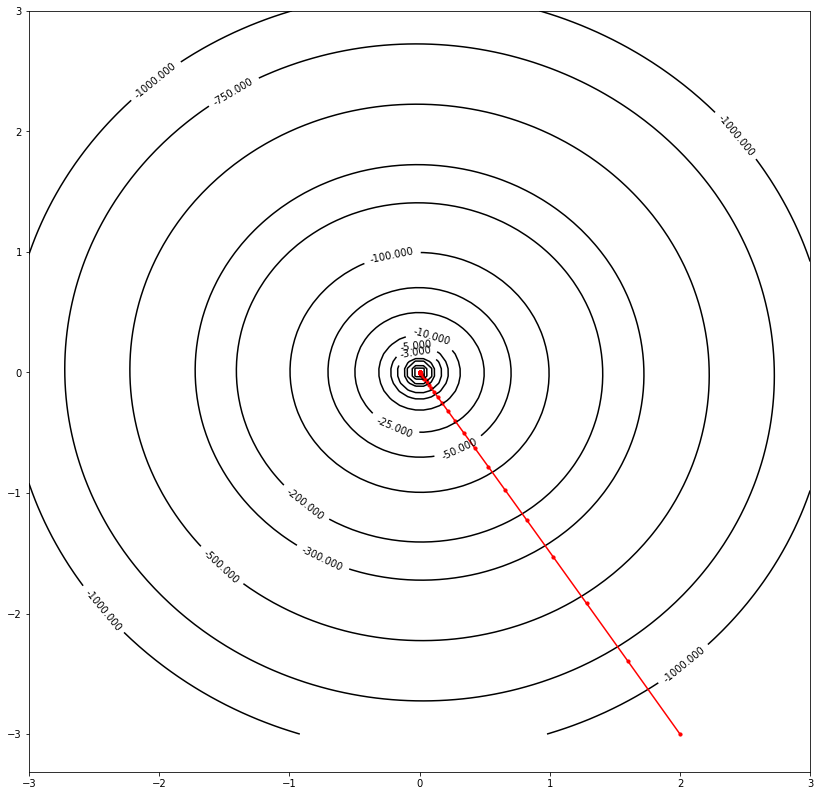

In [17]:
a=100
C1=A1+a*np.eye(2)
def describe_C(C1):
    print('C:',C1)
    print('\nEigenvalues and right eigenvectors:',np.linalg.eig(C1))
    print('\nCondition number:',np.linalg.cond(C1).round())
describe_C(C1)
plot_(start_x,C1,0.001,1e-8,[-1000,-750,-500,-300,-200,-100,-50,-25,-10,-5,-3, -1.5, -1, -0.5, -0.25, 0])

#### 12.2 α=1

C: [[2. 1.]
 [1. 2.]]

Eigenvalues and right eigenvectors: (array([3., 1.]), matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

Condition number: 3.0


f(x)= 0 ;
 start point=[[ 2]
 [-3]];
 R=0.01;
 epsilon=1e-08
Number of iteration =1026; soltion: x = [[ 0.]
 [-0.]]
--- 6.386011123657227 seconds ---


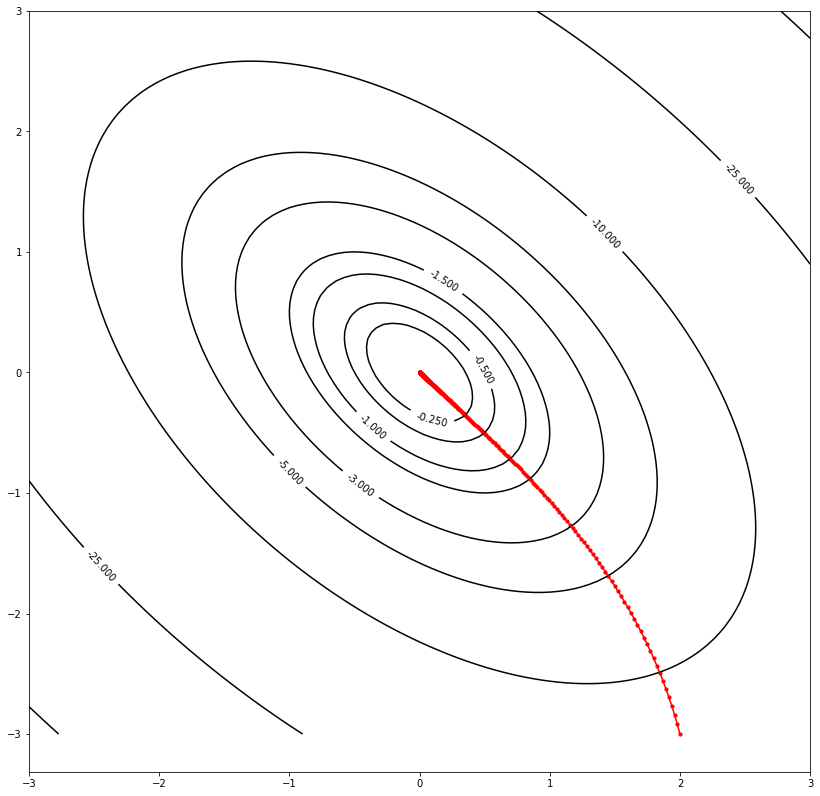

In [18]:
a=1
C1=A1+a*np.eye(2)
describe_C(C1)
plot_(start_x,C1,0.01,1e-8)

#### 12.3 α=0.01

C: [[1.01 1.  ]
 [1.   1.01]]

Eigenvalues and right eigenvectors: (array([2.01, 0.01]), matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

Condition number: 201.0


f(x)= 0 ;
 start point=[[ 2]
 [-3]];
 R=0.2;
 epsilon=1e-06
Number of iteration =2873; soltion: x = [[ 0.]
 [-0.]]
--- 31.68351721763611 seconds ---


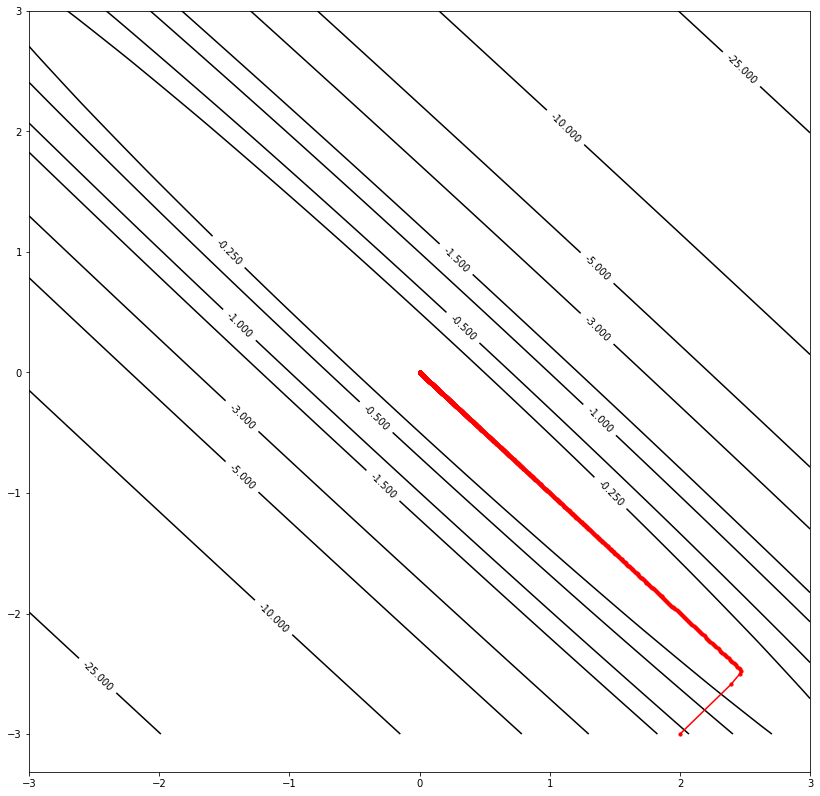

In [19]:
a=0.01
C1=A1+a*np.eye(2)
describe_C(C1)
plot_(start_x,C1,0.2,1e-6)


#### 13.Comment  
As the condition number increases, convergence speed is terriblely slower:  
α = 100, condition number = 1, time ≈ 0.75 seconds  
α = 1, condition number = 3, time ≈ 8 seconds  
α = 0.01, condition number = 201, time ≈ 40 seconds  

# 2 Outliers in different distributions

## 2.1 Normal Distribution

#### Question 1,2,3

In [9]:
R=1000
N=10
def norm_d(R,N):
    means=[]
    for i in range(R):
        n = np.random.normal(size=N)
        means.append(np.mean(n))
    mean=np.mean(means)
    std=np.std(means)
    lower=mean-1.96*std
    upper=mean+1.96*std
    print('\nR:',R,'N:',N)
    print('Mean of means:',mean)
    print('Standard deviation:',std)
    print('95% Confident Interval: [',lower,',',upper,']')

    count=0
    for j in means:
        if (j>=lower and j<=upper):
            count=count+1
        #print(j)
    len(means)
    print ('percentage out of confidential interval:',1-count/1000)
norm_d(R,N)


R: 1000 N: 10
Mean of means: -0.0018690259892540908
Standard deviation: 0.31845884905645133
95% Confident Interval: [ -0.6260483701398987 , 0.6223103181613905 ]
percentage out of confidential interval: 0.051000000000000045


#### 4.Repeat the above with three di erent (and very di erent) N-s, such as 10, 1000, 100,000. Show how the mean-of-means, it's standard deviation, and the confidence region depends on N.

In [10]:
norm_d(R,10)
norm_d(R,1000)
norm_d(R,100000)


R: 1000 N: 10
Mean of means: -0.00626888348269718
Standard deviation: 0.3268171097659945
95% Confident Interval: [ -0.6468304186240463 , 0.634292651658652 ]
percentage out of confidential interval: 0.04500000000000004

R: 1000 N: 1000
Mean of means: -0.0005816811413091477
Standard deviation: 0.03142208117691803
95% Confident Interval: [ -0.06216896024806849 , 0.0610055979654502 ]
percentage out of confidential interval: 0.049000000000000044

R: 1000 N: 100000
Mean of means: 7.33547947393239e-05
Standard deviation: 0.0032209068452246515
95% Confident Interval: [ -0.006239622621900993 , 0.006386332211379641 ]
percentage out of confidential interval: 0.04300000000000004


As N becomes larger, mean of means will be closer to 0; standard deviation seems to be smaller, which means less fluctuation; confidence interval seems to be narrower, closer to 0 point, but percentage out of confidential interval seems to remain the same.

## 2.2 Pareto distribution

#### 5.Create a large number of pareto random variables. Show their distribution on a histogram. Attempt to make the histogram look good.

(array([648., 143.,  64.,  28.,  22.,  17.,   4.,   4.,   5.,   5.,   5.,
          3.,   3.,   1.,   3.,   4.,   2.,   4.,   2.,   2.,   2.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,   1.,   0.,   0.,
          0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   2.,   0.,   1.,
          0.,   1.,   0.,   0.,   1.,   1.]),
 array([5.69177390e-04, 2.00055779e+00, 4.00054641e+00, 6.00053503e+00,
        8.00052364e+00, 1.00005123e+01, 1.20005009e+01, 1.40004895e+01,
        1.60004781e+01, 1.80004667e+01, 2.00004553e+01, 2.20004440e+01,
        2.40004326e+01, 2.60004212e+01, 2.80004098e+01, 3.00003984e+01,
        3.20003870e+01, 3.40003757e+01, 3.60003643e+01, 3.80003529e+01,
        4.00003415e+01, 4.20003301e+01, 4.40003187e+01, 4.60003074e+01,
        4.80002960e+01, 5.00002846e+01, 5.20002732e+01, 5.40002618e+01,
        5.60002504e+01, 5.80002391e+01, 6.00002277e+01, 6.20002163e+01,
        6.40002049e+01, 6.60001935e+01, 6.80001821e+01, 7.00001708e+01,
        7.

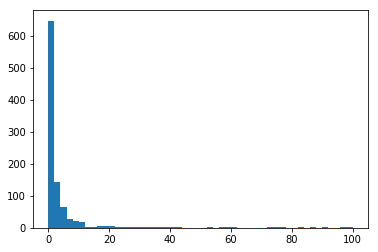

In [22]:
ns=np.random.pareto(1,size=1000)
new_ns=[]
for i in ns:
    if i <100:
        new_ns.append(i)
plt.hist(ns,bins=50,range=(ns.min(),100))

#### Question 6,7,8,9

In [29]:
N=1000
R=1000
def pareto(R,N):
    means=[]
    for i in range(R):
        n = np.random.pareto(1,size=N)
        means.append(np.mean(n))
    mean=np.mean(means)
    std=np.std(means)
    lower=mean-1.96*std
    upper=mean+1.96*std
    print('\nR:',R,'N:',N)
    print('Mean of means:',mean)
    print('Standard deviation:',std)
    print('95% Confident Interval: [',lower,',',upper,']')

    count=0
    for j in means:
        if (j>=lower and j<=upper):
            count=count+1
        #print(j)
    len(means)
    print ('percentage out of confidential interval:',1-count/1000)
    
pareto(R,1000)


R: 1000 N: 1000
Mean of means: 13.532796636559045
Standard deviation: 36.22141106022976
95% Confident Interval: [ -57.46116904149129 , 84.52676231460937 ]
percentage out of confidential interval: 0.015000000000000013


In [30]:
pareto(R,10)
pareto(R,1000)
pareto(R,100000)


R: 1000 N: 10
Mean of means: 9.481291886357658
Standard deviation: 41.97652178273889
95% Confident Interval: [ -72.79269080781057 , 91.75527458052588 ]
percentage out of confidential interval: 0.01100000000000001

R: 1000 N: 1000
Mean of means: 13.665206470093807
Standard deviation: 37.05859624436057
95% Confident Interval: [ -58.969642168852914 , 86.30005510904053 ]
percentage out of confidential interval: 0.013000000000000012

R: 1000 N: 100000
Mean of means: 15.800756894296502
Standard deviation: 22.629209992498172
95% Confident Interval: [ -28.552494690999918 , 60.15400847959292 ]
percentage out of confidential interval: 0.01200000000000001


#### 10.Finally compare your results for normal and Pareto distributions.

Pareto distribution seems to be more even than normal distribution and it has more extreme values, so the fluctuation is larger than normal distribution as is demonstated via std and mean.   
Therefore, confidence interval is wider than normal distribution, leading to less outliers under 95% confidence level in most cases, but one thing to point out is that its flucuation is so large that the percentage of outliers differs dramatically among each other on different runs, it cound range from 0.001 to 0.02.